In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
cities = gpd.read_file(r'./Introduction to GIS Analysis with GeoPandas using Python/Shapefiles/belgian_cities.shp')

In [11]:
cities.head(3)

,NAME_4,geometry
0,Anderlecht,"POLYGON ((143793.126 166452.379, 143610.878 16..."
1,Brussel,"POLYGON ((147766.293 170637.180, 147826.869 17..."
2,Elsene,"MULTIPOLYGON (((151867.674 167090.660, 151805...."


In [12]:
type(cities)

geopandas.geodataframe.GeoDataFrame

In [14]:
cities.head()

,NAME_4,geometry
0,Anderlecht,"POLYGON ((143793.126 166452.379, 143610.878 16..."
1,Brussel,"POLYGON ((147766.293 170637.180, 147826.869 17..."
2,Elsene,"MULTIPOLYGON (((151867.674 167090.660, 151805...."
3,Etterbeek,"POLYGON ((152732.322 169655.021, 152703.407 16..."
4,Evere,"POLYGON ((153968.453 172252.061, 153885.348 17..."


In [16]:
cities.columns

Index(['NAME_4', 'geometry'], dtype='object')

<AxesSubplot:>

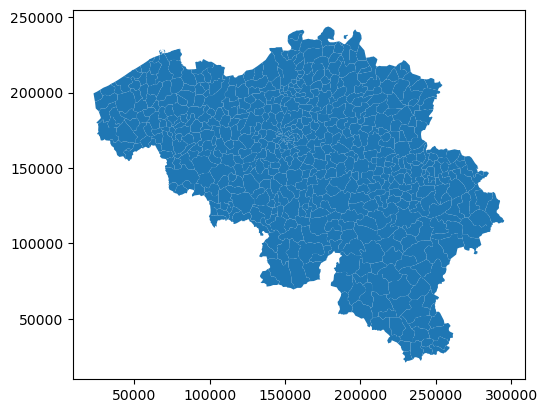

In [19]:
# Visualize the map of study area
cities.plot()

In [20]:
len(cities)
# roads of the cities

589

<AxesSubplot:>

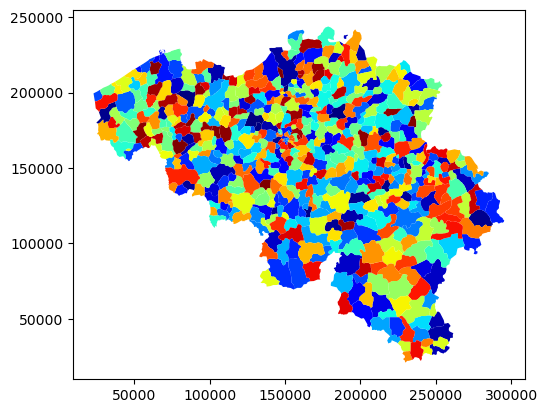

In [23]:
# to plot the map with random color cmap =color map
# cities.plot(cmap = 'jet')
# to color map accoding to the cities

cities.plot(cmap = 'jet', column = 'NAME_4')

<AxesSubplot:>

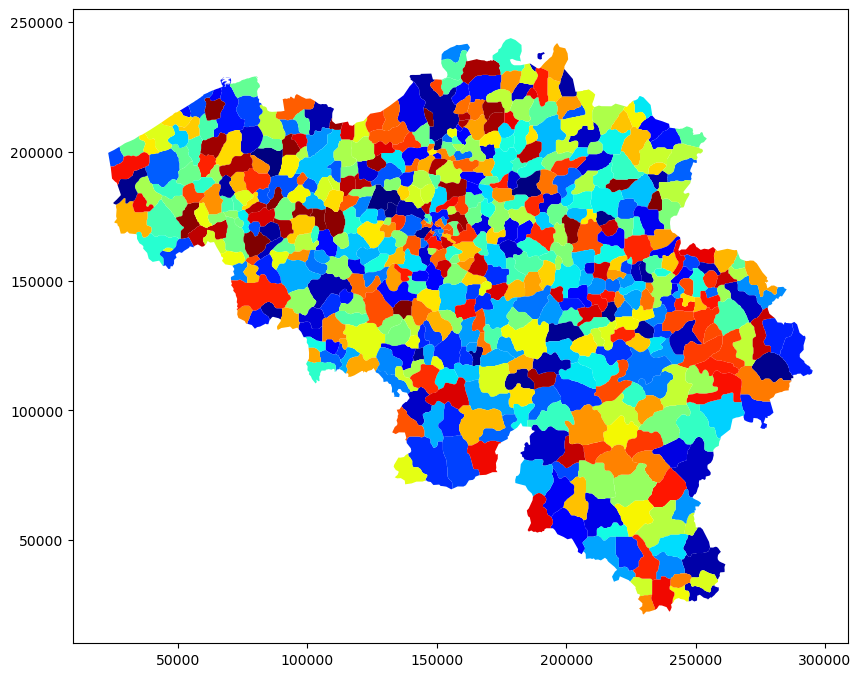

In [24]:
cities.plot(cmap = 'jet', column = 'NAME_4', figsize = (10,10))

In [26]:
# import the aoi
aoi = gpd.read_file(r'./Introduction to GIS Analysis with GeoPandas using Python/Shapefiles/area_of_interest_.shp')

In [27]:
aoi.head

<bound method NDFrame.head of    Id                                           geometry
0   0  POLYGON ((155695.193 208475.625, 155876.391 20...>

In [29]:
aoi.columns

Index(['Id', 'geometry'], dtype='object')

<AxesSubplot:>

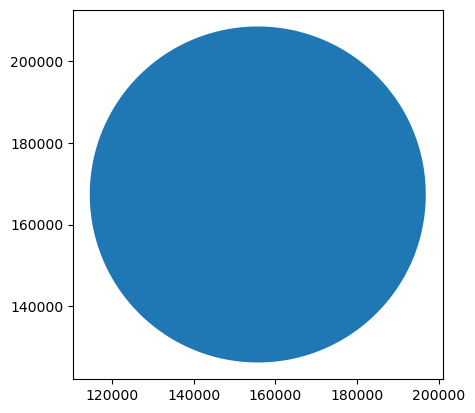

In [30]:
aoi.plot()

<AxesSubplot:>

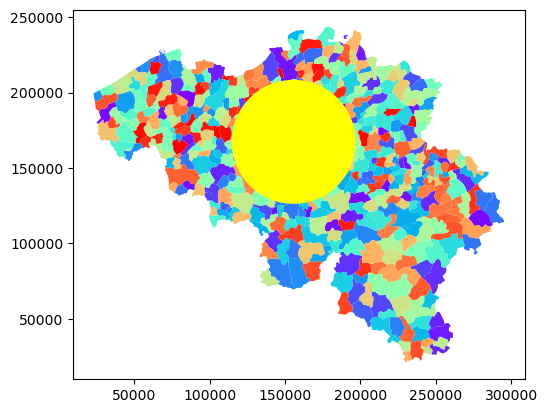

In [37]:
# plotting aoi on the top of belgium
fig, ax = plt.subplots(1)
cities.plot(ax=ax, cmap = 'rainbow', column = 'NAME_4') #we can choose colorscheme from matplotlib documentation
aoi.plot(ax=ax, facecolor = 'yellow') #in facecolor we can directly give color with name


<AxesSubplot:>

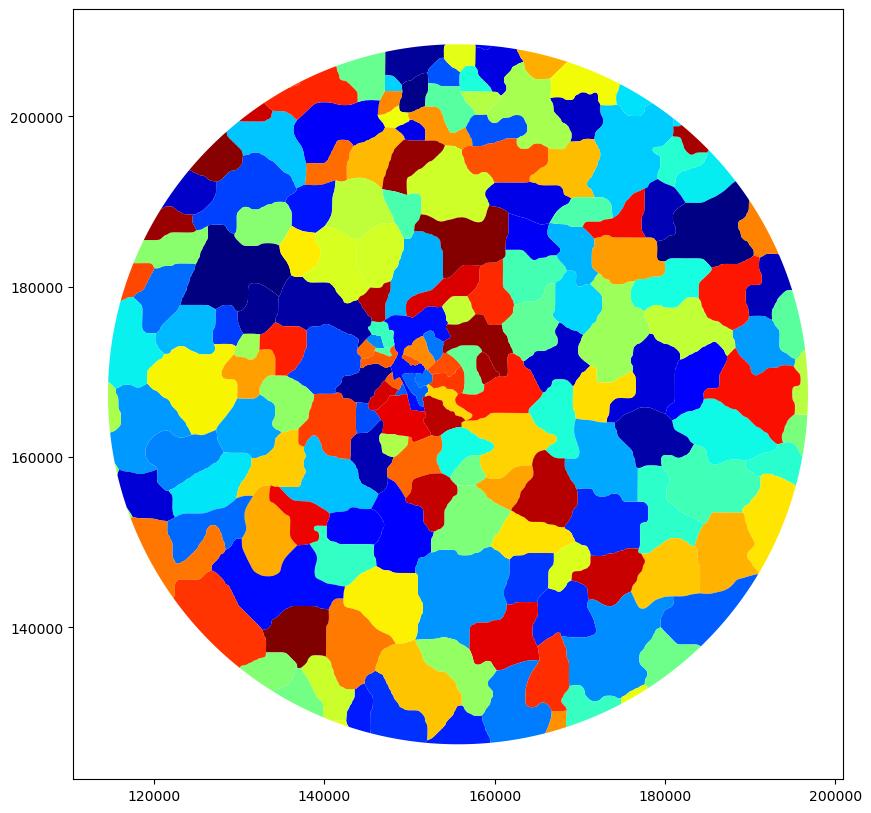

In [40]:
# Intersecting two layers

cities_aoi = gpd.overlay(cities, aoi, how = 'intersection')
cities_aoi.plot(figsize = (10,10), cmap = 'jet', column = 'NAME_4')

In [41]:
cities_aoi

,NAME_4,Id,geometry
0,Anderlecht,0,"POLYGON ((143793.126 166452.379, 143610.878 16..."
1,Brussel,0,"POLYGON ((147766.293 170637.180, 147826.869 17..."
2,Elsene,0,"MULTIPOLYGON (((151867.674 167090.660, 151805...."
3,Etterbeek,0,"POLYGON ((152732.322 169655.021, 152703.407 16..."
4,Evere,0,"POLYGON ((153968.453 172252.061, 153885.348 17..."
...,...,...,...
181,Jemeppe-sur-Sambre,0,"POLYGON ((168377.727 128291.878, 168387.327 12..."
182,La Bruyère,0,"POLYGON ((178038.074 132890.380, 177986.856 13..."
183,Namur,0,"POLYGON ((174844.759 131020.333, 174838.102 13..."
184,Sambreville,0,"POLYGON ((165946.567 127585.068, 166304.590 12..."


In [43]:
# calculate the area of polygon
# the area is in square meters whihc can be seen by code in line 44
cities_aoi.area

0      1.783468e+07
1      3.221806e+07
2      6.039562e+06
3      2.962803e+06
4      5.037014e+06
           ...     
181    1.751827e+07
182    2.408626e+07
183    2.395717e+06
184    4.317153e+06
185    3.290583e+07
Length: 186, dtype: float64

In [44]:
cities.crs

<Derived Projected CRS: PROJCS["BD72 / Belgian Lambert 72",GEOGCS["BD72",D ...>
Name: BD72 / Belgian Lambert 72
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: Reseau National Belge 1972
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [46]:
# assigning a new column - area

cities_aoi['Area (km2)'] = cities_aoi.area/1000000
cities_aoi

,NAME_4,Id,geometry,Area (km2)
0,Anderlecht,0,"POLYGON ((143793.126 166452.379, 143610.878 16...",17.834684
1,Brussel,0,"POLYGON ((147766.293 170637.180, 147826.869 17...",32.218059
2,Elsene,0,"MULTIPOLYGON (((151867.674 167090.660, 151805....",6.039562
3,Etterbeek,0,"POLYGON ((152732.322 169655.021, 152703.407 16...",2.962803
4,Evere,0,"POLYGON ((153968.453 172252.061, 153885.348 17...",5.037014
...,...,...,...,...
181,Jemeppe-sur-Sambre,0,"POLYGON ((168377.727 128291.878, 168387.327 12...",17.518270
182,La Bruyère,0,"POLYGON ((178038.074 132890.380, 177986.856 13...",24.086256
183,Namur,0,"POLYGON ((174844.759 131020.333, 174838.102 13...",2.395717
184,Sambreville,0,"POLYGON ((165946.567 127585.068, 166304.590 12...",4.317153


In [48]:
# to save the newly made geodataframe in shapefile

cities_aoi.to_file('./Introduction to GIS Analysis with GeoPandas using Python/Shapefiles/intersected_cities.shp')

# See you again